https://medium.com/@ksusorokina/image-classification-with-convolutional-neural-networks-496815db12a8

https://medium.com/@umdfirecoml/a-step-by-step-guide-on-how-to-download-your-google-drive-data-to-your-jupyter-notebook-using-the-52f4ce63c66c

In [ ]:
#Downloading resources
!curl http://murillocjr.co.nf/resources -o resources.tar.gz


In [52]:
#UnTar
import tarfile,sys

tar = tarfile.open("resources.tar.gz")
tar.extractall()
tar.close()
    
!ls

images               tar                  trainingCNN.ipynb
preview              tmp                  validation
resources.tar.gz     train                visualizingCNN.ipynb


(183, 275, 3)
(1, 183, 275, 3)
preview/z_0_8776.jpeg


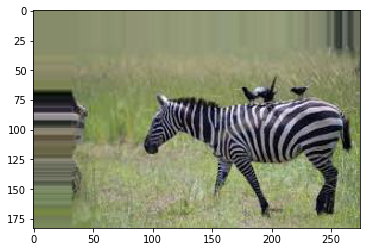

(183, 275, 3)


In [32]:
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import imageio as imageio
import os, random
import matplotlib.pyplot as plt

datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

#no rotation, skewing or shearing

img = load_img('images/z0.jpg')  
x = img_to_array(img)
print(x.shape)
x = x.reshape((1,) + x.shape)
x.shape
print(x.shape)

#image loaded

i = 0
for batch in datagen.flow(x, batch_size=1,
                         save_to_dir='preview', save_prefix='z', save_format='jpeg'):
    i += 1
    if i > 3: #extra generated image count
        break
        
#augmented data generated

random_file = "preview/"+random.choice(os.listdir("preview"))
print(random_file)
image = imageio.imread(random_file)
plt.imshow(image)
plt.show()
print(image.shape)

In [33]:
# MODEL
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

model = Sequential()
model.add(Conv2D(32, (7, 7), input_shape=(300, 300, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [34]:
batch_size = 16

train_datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

test_datagen = ImageDataGenerator(
        width_shift_range=0.2,
        height_shift_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest')

train_generator = train_datagen.flow_from_directory(
        'train',  
        target_size=(300, 300),  
        batch_size=batch_size,
        class_mode='binary')  

validation_generator = test_datagen.flow_from_directory(
        'validation',
        target_size=(300, 300),
        batch_size=batch_size,
        class_mode='binary')

Found 15 images belonging to 2 classes.
Found 4 images belonging to 2 classes.


In [35]:
# TRAINING
model.fit_generator(
        train_generator,
        steps_per_epoch=40 ,
        epochs=2,
        validation_data=validation_generator,
        validation_steps=16 )

Epoch 1/2
40/40 [==============================] - 87s 2s/step - loss: 7.5389 - acc: 0.5300 - val_loss: 8.0590 - val_acc: 0.5000
Epoch 2/2
40/40 [==============================] - 82s 2s/step - loss: 7.5218 - acc: 0.5333 - val_loss: 8.0590 - val_acc: 0.5000


In [36]:

for layer in model.layers:
    i_s = layer.input_shape
    print(i_s)

(None, 300, 300, 3)
(None, 294, 294, 32)
(None, 294, 294, 32)
(None, 147, 147, 32)
(None, 691488)
(None, 64)
(None, 64)
(None, 64)
(None, 1)


(None, 300, 300, 3)
{'name': 'conv2d_5', 'trainable': True, 'batch_input_shape': (None, 300, 300, 3), 'dtype': 'float32', 'filters': 32, 'kernel_size': (7, 7), 'strides': (1, 1), 'padding': 'valid', 'data_format': 'channels_last', 'dilation_rate': (1, 1), 'activation': 'linear', 'use_bias': True, 'kernel_initializer': {'class_name': 'VarianceScaling', 'config': {'scale': 1.0, 'mode': 'fan_avg', 'distribution': 'uniform', 'seed': None}}, 'bias_initializer': {'class_name': 'Zeros', 'config': {}}, 'kernel_regularizer': None, 'bias_regularizer': None, 'activity_regularizer': None, 'kernel_constraint': None, 'bias_constraint': None}
-----------
2
-----------
(7, 7, 3, 32)
(32,)
-----------
(7, 7)


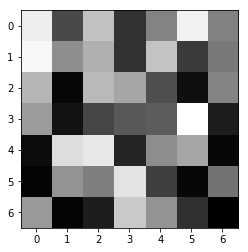

(7, 7)


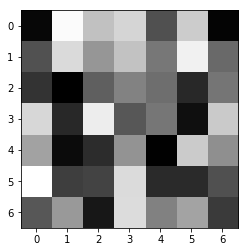

(7, 7)


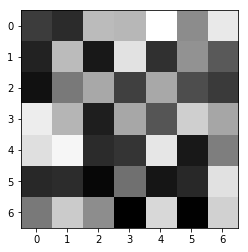

(7, 7)


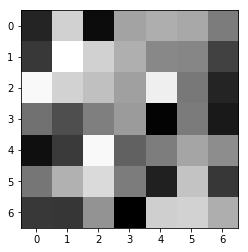

(7, 7)


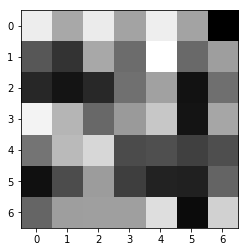

(7, 7)


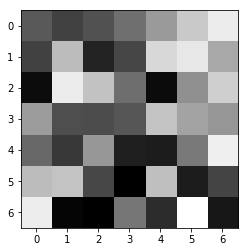

(7, 7)


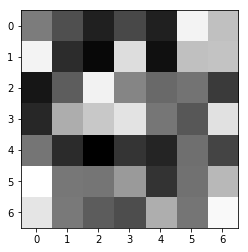

(7, 7)


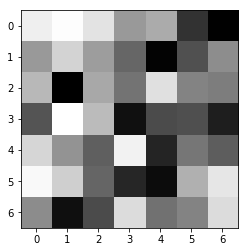

(7, 7)


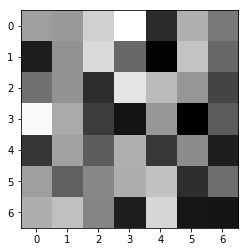

(7, 7)


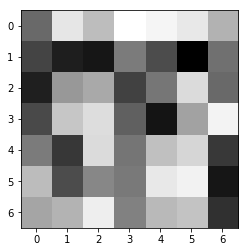

(7, 7)


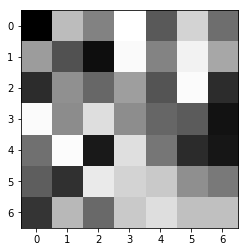

(7, 7)


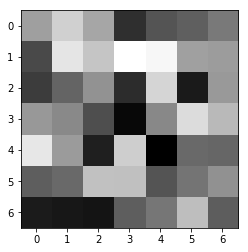

(7, 7)


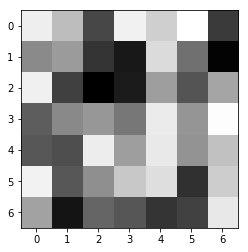

(7, 7)


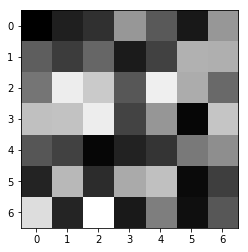

(7, 7)


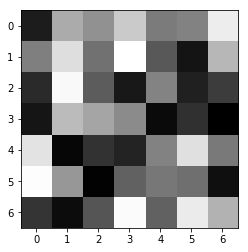

(7, 7)


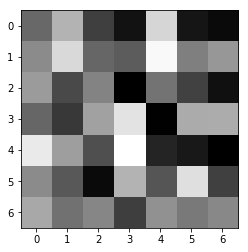

(7, 7)


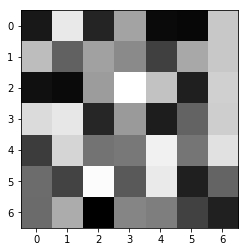

(7, 7)


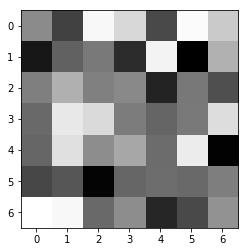

(7, 7)


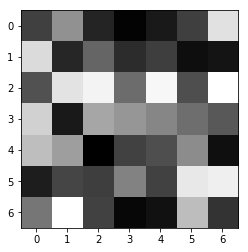

(7, 7)


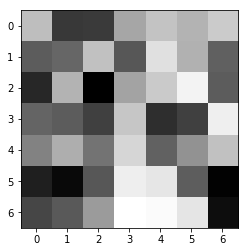

(7, 7)


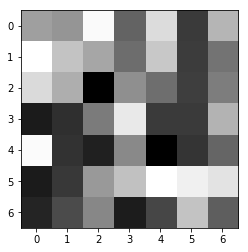

(7, 7)


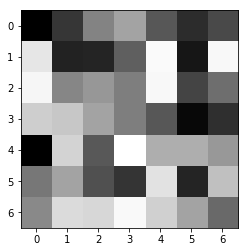

(7, 7)


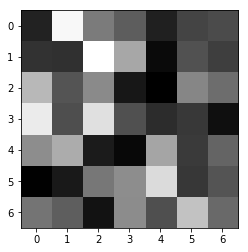

(7, 7)


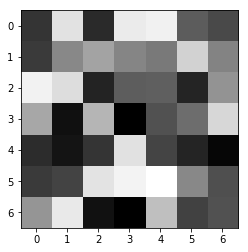

(7, 7)


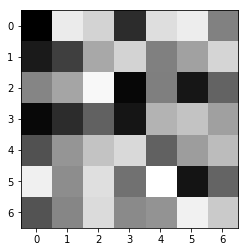

(7, 7)


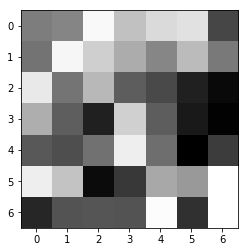

(7, 7)


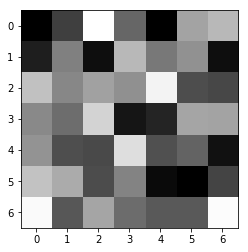

(7, 7)


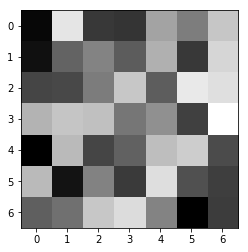

(7, 7)


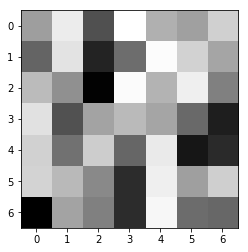

(7, 7)


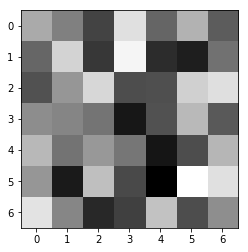

(7, 7)


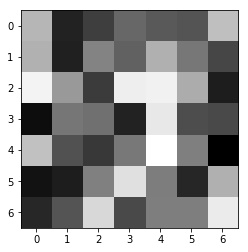

(7, 7)


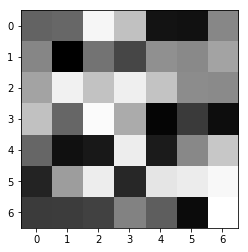

In [37]:
conv_layer_0 = model.layers[0]

i_s = conv_layer_0.input_shape
print(i_s)

config = conv_layer_0.get_config()
print(config)

print("-----------")

weights = conv_layer_0.get_weights()
print(len(weights))

print("-----------")

a_0 = weights[0]
a_1 = weights[1]
print(a_0.shape)
print(a_1.shape)

print("-----------")

for i in range(0, 32):
    filter = a_0[:,:,:,i]
    filter_blue = filter[:,:,2]
    print(filter_blue.shape)
    plt.imshow(filter_blue, cmap='gray')
    plt.show()